In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

# Combine the data into a single dataset
combined_pyber_data = pd.merge(ride_df, city_df, on="city")


In [2]:
# Display the data table for preview
combined_pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
combined_pyber_data["color"] =  "coral"

combined_pyber_data.loc[combined_pyber_data['type']  == 'Suburban',  'color'] = 'lightskyblue'
combined_pyber_data.loc[combined_pyber_data['type']  == 'Rural',  'color'] = 'gold'

In [12]:
# Obtain the x and y coordinates for each of the three city types

grouped_by_cities = combined_pyber_data.groupby('city')
rides_per_city = grouped_by_cities["ride_id"].count()

fares_per_city = grouped_by_cities["fare"].mean()

drivers_per_city = grouped_by_cities["driver_count"].sum()

colors_list = grouped_by_cities["color"].unique()
colors = [color[0] for color in colors_list]


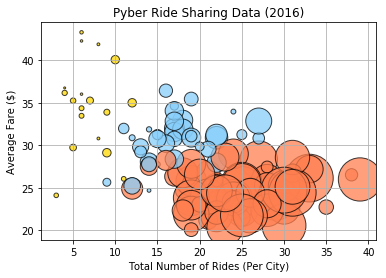

In [28]:
plot1 = plt.scatter(rides_per_city, fares_per_city, marker="o", facecolors=colors, edgecolors="black",
            s=drivers_per_city, alpha=0.75)

# Incorporate the other graph properties
# plt.ylim(fares_per_city.min(), fares_per_city.max() + 5)
# plt.xlim(0, rides_per_city.max() + 10)
plt.grid()

# Create a legend
# plt.legend(("Urban", "Suburban", "Rural"), loc="best")

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Save Figure
plt.savefig("Pyscatter.png")
# Show plot
plt.show()

## Total Fares by City Type

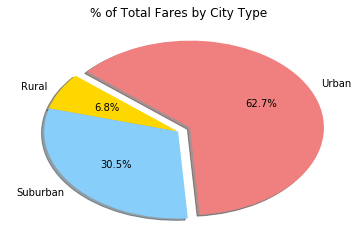

In [36]:
# Calculate Type Percents

total_fares = combined_pyber_data['fare'].sum()

grouped_by_types = combined_pyber_data.groupby('type')
fares_per_type = (grouped_by_types['fare'].sum()/total_fares)*100
fares_per_type

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")

plt.pie(fares_per_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("TotalFaresByCityType.png")

# Show Figure
plt.show()


## Total Rides by City Type

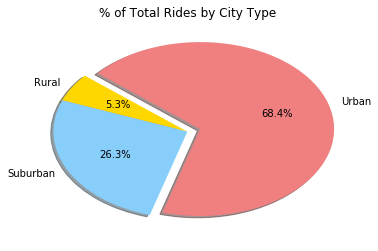

In [37]:
# Calculate Ride Percents
total_rides = combined_pyber_data['ride_id'].count()

rides_per_type = (grouped_by_types['ride_id'].count()/total_rides)*100

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")

plt.pie(rides_per_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("TotalRidesByCityType.png")

# Show Figure
plt.show()


## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

total_drivers_list = grouped_by_cities['driver_count'].unique()

total_drivers = total_drivers_list.sum()
total_driver = total_drivers[0]
total_driver

# total_drivers_list

city_type_list = grouped_by_cities['type'].unique()


# print(city_type_list)
print(city_type_list[0][0])
# print(city_type_list[0].to_string())
# print(city_type_list.values)
# print(city_type_list)

# combined_type_data = pd.DataFrame({'type':city_type_list, 'total_drivers':total_drivers_list})
# combined_type_data.head()

# combined_type_data = pd.merge(total_drivers_list, city_type_list, on="city")
# combined_type_data.head()
# grouped_by_cities['type'].value

grouped_drivers = combined_type_data.groupby('type')
# grouped_drivers.count()
# grouped_drivers_by_types = grouped_drivers['total_drivers'].sum()

# drivers_per_type = (grouped_by_cities ['type'].sum()/total_drivers)*100
# drivers_per_type


# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()